In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('Titanic-Dataset.csv')  # Specify the path to your file
df.info()
df.tail(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [3]:
# Drop unnecessary columns
final_data = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')

# Fill missing values
if 'Age' in final_data.columns:
    final_data['Age'] = final_data['Age'].fillna(final_data['Age'].mean())
if 'Embarked' in final_data.columns:
    final_data['Embarked'] = final_data['Embarked'].fillna(final_data['Embarked'].mode()[0])

In [4]:
# Encode categorical columns
if 'Sex' in final_data.columns:
    final_data['Sex'] = final_data['Sex'].map({'male': 1, 'female': 0})
if 'Embarked' in df.columns:
    final_data = pd.get_dummies(final_data, columns=['Embarked'], drop_first=True)

In [5]:
#check new data frame
final_data.info()
final_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,False,True
1,1,1,0,38.000000,1,0,71.2833,False,False
2,1,3,0,26.000000,0,0,7.9250,False,True
3,1,1,0,35.000000,1,0,53.1000,False,True
4,0,3,1,35.000000,0,0,8.0500,False,True
5,0,3,1,29.699118,0,0,8.4583,True,False
6,0,1,1,54.000000,0,0,51.8625,False,True
7,0,3,1,2.000000,3,1,21.0750,False,True
8,1,3,0,27.000000,0,2,11.1333,False,True
9,1,2,0,14.000000,1,0,30.0708,False,False


In [6]:
# Define features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
if 'Embarked_Q' in df.columns:
    features.append('Embarked_Q')
if 'Embarked_S' in df.columns:
    features.append('Embarked_S')
target = 'Survived'

In [7]:
#check new data frame
final_data.info()
final_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,False,True
1,1,1,0,38.000000,1,0,71.2833,False,False
2,1,3,0,26.000000,0,0,7.9250,False,True
3,1,1,0,35.000000,1,0,53.1000,False,True
4,0,3,1,35.000000,0,0,8.0500,False,True
5,0,3,1,29.699118,0,0,8.4583,True,False
6,0,1,1,54.000000,0,0,51.8625,False,True
7,0,3,1,2.000000,3,1,21.0750,False,True
8,1,3,0,27.000000,0,2,11.1333,False,True
9,1,2,0,14.000000,1,0,30.0708,False,False


In [8]:
columns = [col for col in final_data.columns]

for col in columns:
    print("\n",final_data[col].value_counts(),"\n")


 Survived
0    549
1    342
Name: count, dtype: int64 


 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 


 Sex
1    577
0    314
Name: count, dtype: int64 


 Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64 


 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 


 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 


 Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64 


 Embarked_Q
False    814
True      77
Name: count, dtype: int64 


 Embarked_S
True     646
False    245
Name: count, dtype: int64 



In [9]:
# Split data into train/test (80/20)
X = final_data[features]
y = final_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

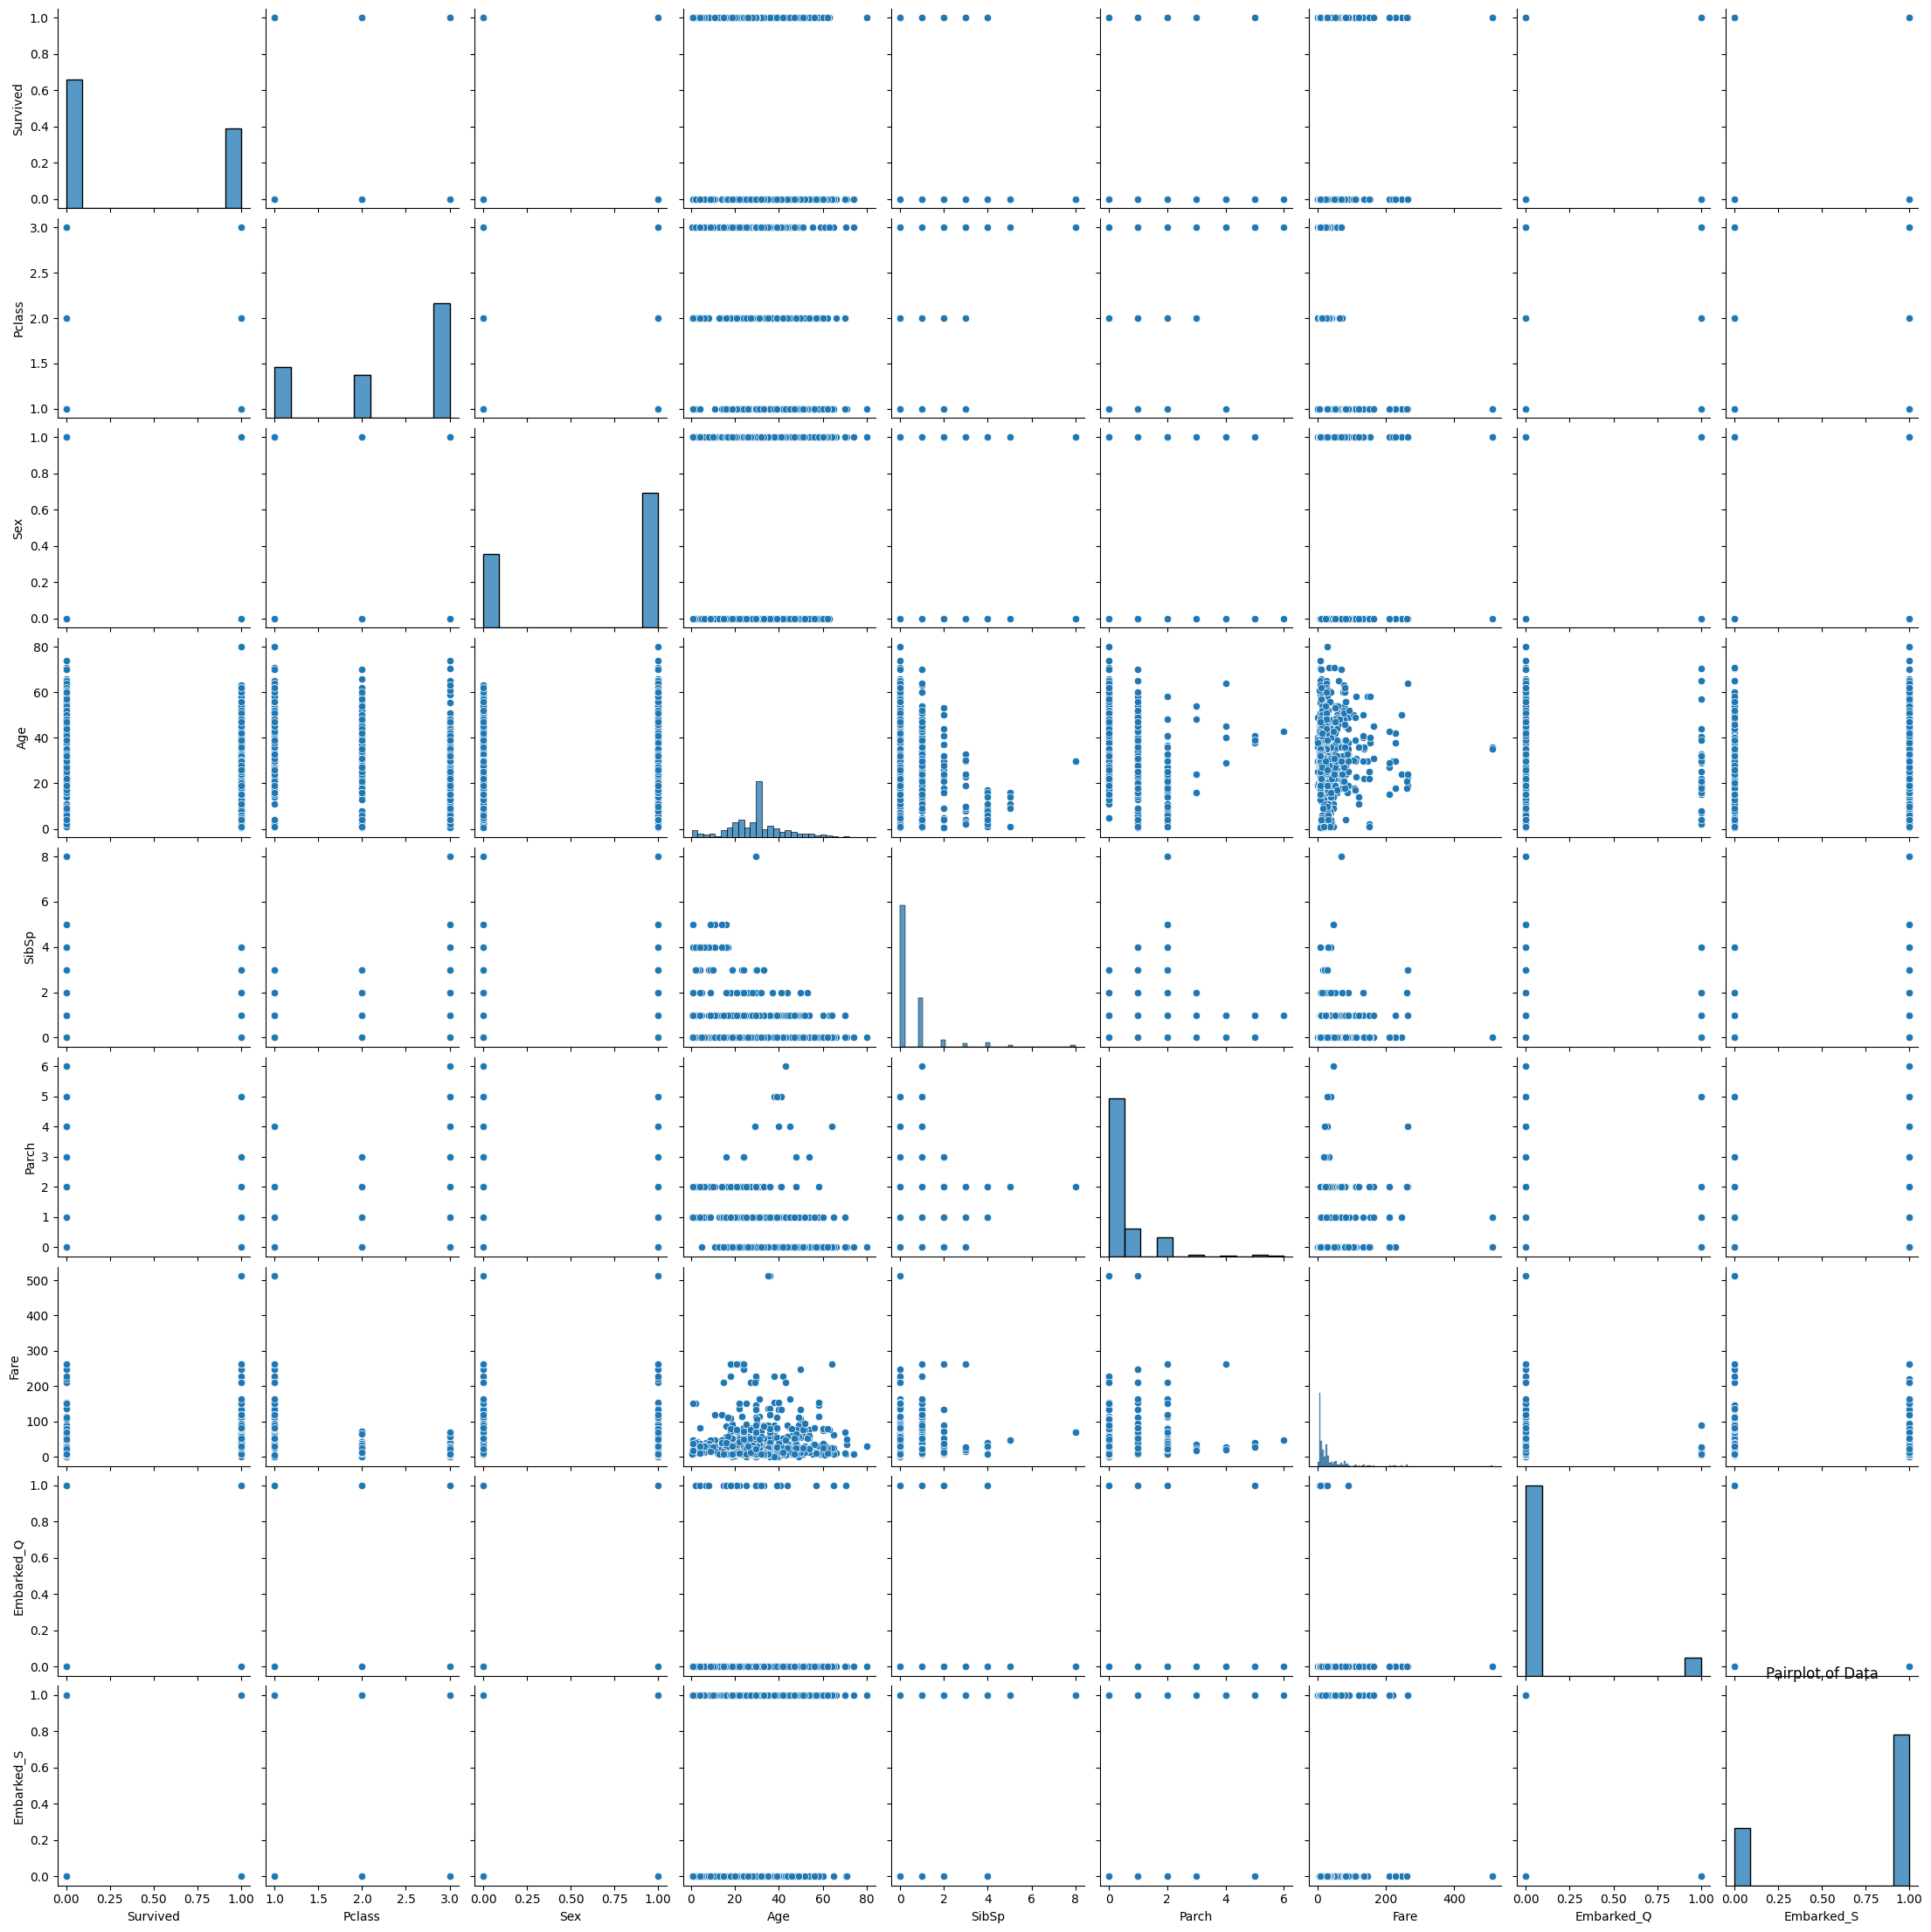

In [10]:
sns.pairplot(final_data)
plt.title('Pairplot of Data')
plt.show()

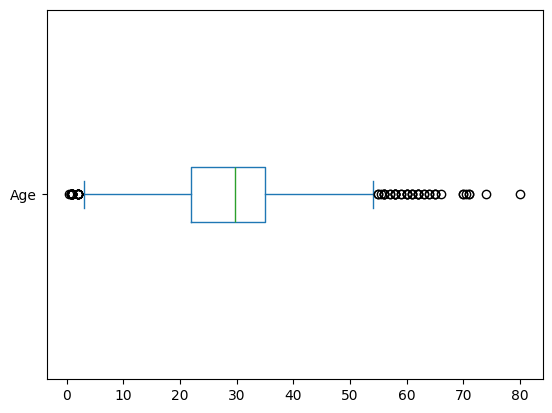

In [11]:
ax=final_data.plot.box(vert=False, column='Age')

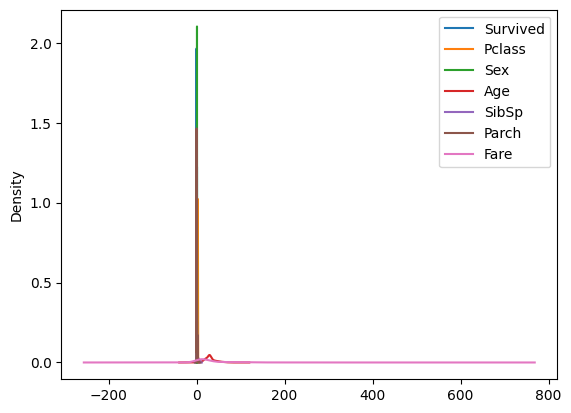

In [12]:
ax=final_data.plot.kde()

In [13]:
# Logistic Regression for not scaled data 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
final_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,False,True
1,1,1,0,38.000000,1,0,71.2833,False,False
2,1,3,0,26.000000,0,0,7.9250,False,True
3,1,1,0,35.000000,1,0,53.1000,False,True
4,0,3,1,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,False,True
887,1,1,0,19.000000,0,0,30.0000,False,True
888,0,3,0,29.699118,1,2,23.4500,False,True
889,1,1,1,26.000000,0,0,30.0000,False,False


In [28]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



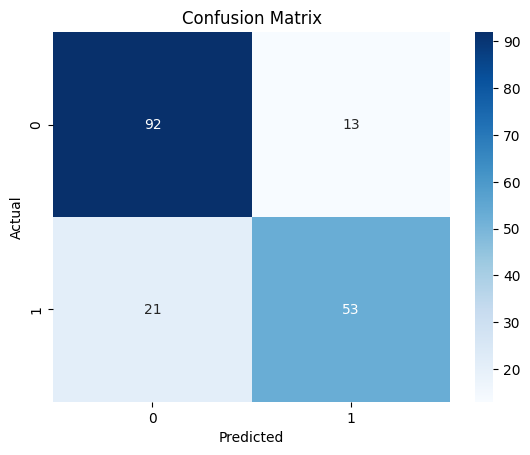

In [29]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
scaled_data=MinMaxScaler().fit_transform(final_data)

In [16]:
scaled_data


array([[0.        , 1.        , 1.        , ..., 0.01415106, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.13913574, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.01546857, 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.04577135, 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.0585561 , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.01512699, 1.        ,
        0.        ]], shape=(891, 9))

In [17]:
scaled_data=pd.DataFrame(scaled_data)

In [18]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
 5   5       891 non-null    float64
 6   6       891 non-null    float64
 7   7       891 non-null    float64
 8   8       891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


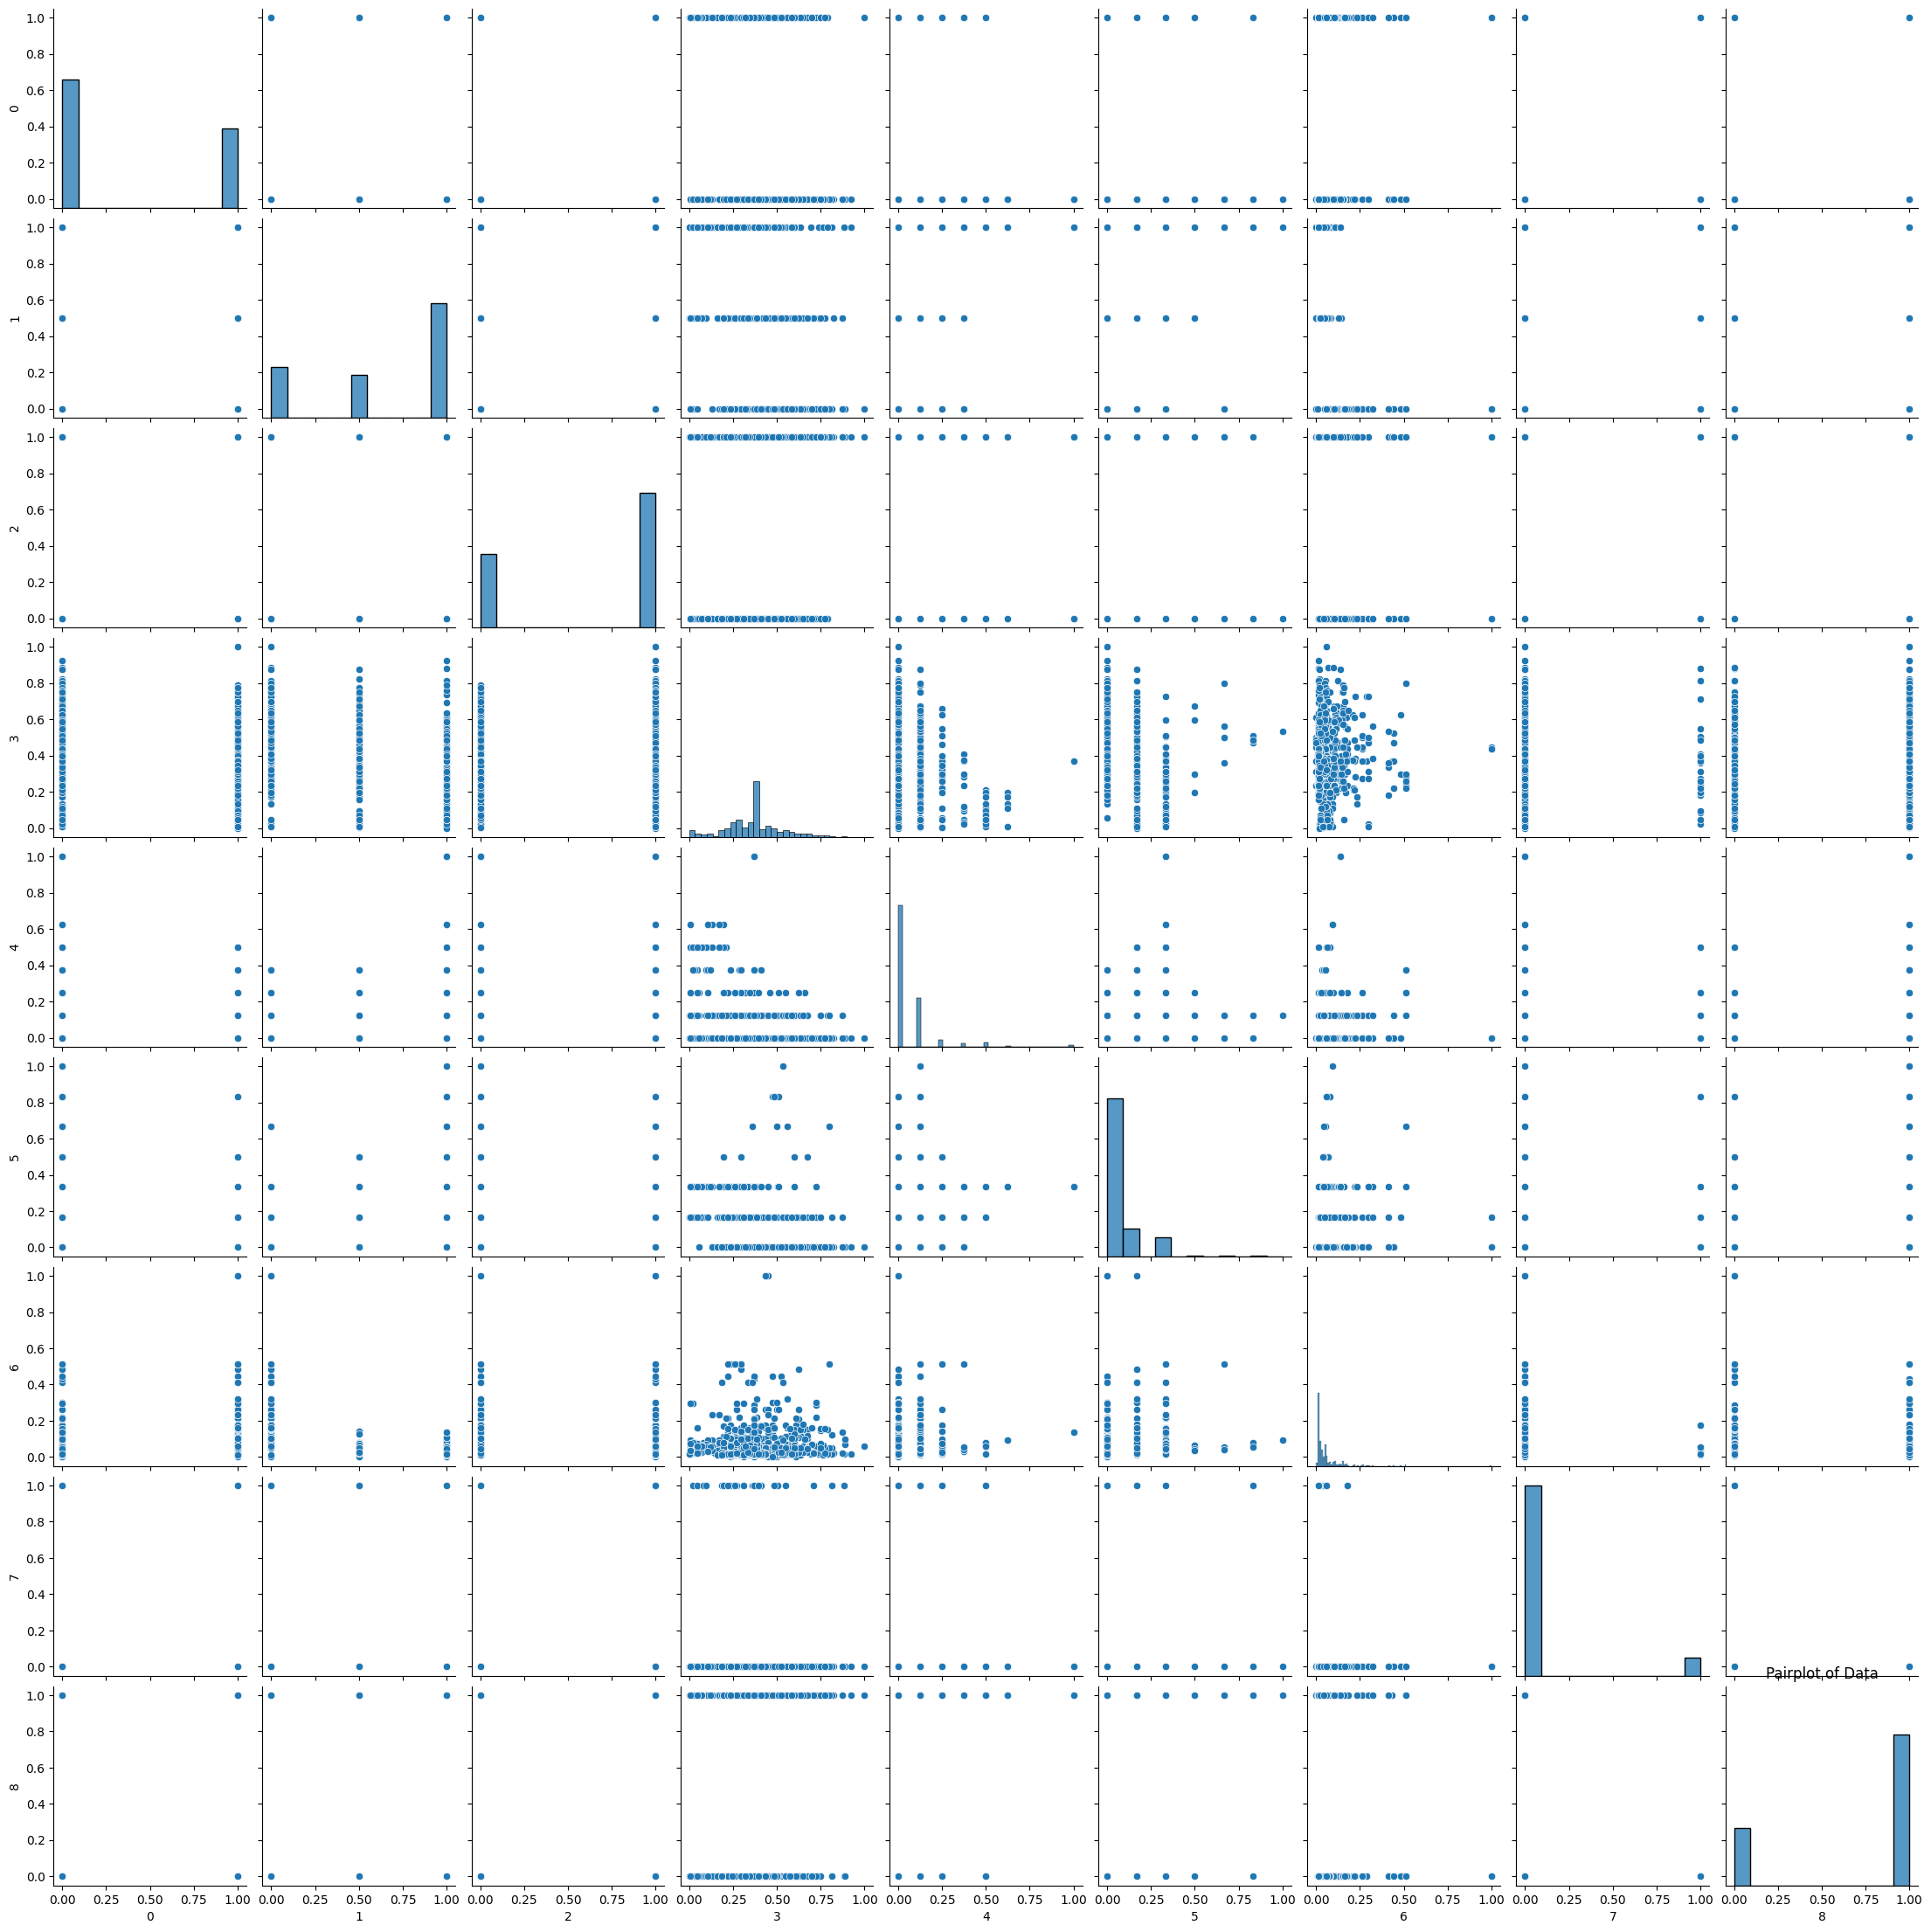

In [19]:
sns.pairplot(scaled_data)
plt.title('Pairplot of Data')
plt.show()

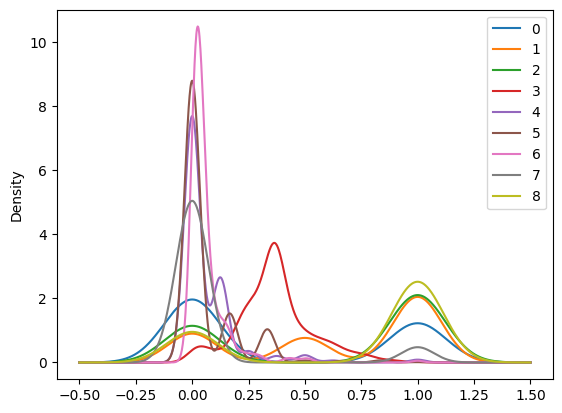

In [20]:
ax=scaled_data.plot.kde()

In [21]:
scaled_data.tail()


,0,1,2,3,4,5,6,7,8
886,0.0,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.0,1.0
887,1.0,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,1.0
888,0.0,1.0,0.0,0.367921,0.125,0.333333,0.045771,0.0,1.0
889,1.0,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.0
890,0.0,1.0,1.0,0.396833,0.000,0.000000,0.015127,1.0,0.0


In [22]:
#scaled_data.columns=['Survived',	'Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked_Q',	'Embarked_S']

In [23]:
features1 = [2,3,4,5,6,7]
target1 = [1]

print (scaled_data[features1])
print (scaled_data[target1])

       2         3      4         5         6    7
0    1.0  0.271174  0.125  0.000000  0.014151  0.0
1    0.0  0.472229  0.125  0.000000  0.139136  0.0
2    0.0  0.321438  0.000  0.000000  0.015469  0.0
3    0.0  0.434531  0.125  0.000000  0.103644  0.0
4    1.0  0.434531  0.000  0.000000  0.015713  0.0
..   ...       ...    ...       ...       ...  ...
886  1.0  0.334004  0.000  0.000000  0.025374  0.0
887  0.0  0.233476  0.000  0.000000  0.058556  0.0
888  0.0  0.367921  0.125  0.333333  0.045771  0.0
889  1.0  0.321438  0.000  0.000000  0.058556  0.0
890  1.0  0.396833  0.000  0.000000  0.015127  1.0

[891 rows x 6 columns]
       1
0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
..   ...
886  0.5
887  0.0
888  1.0
889  0.0
890  1.0

[891 rows x 1 columns]


In [24]:
# Split data into train/test (80/20)
X1 = scaled_data[features1]
y1 = scaled_data[target1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [25]:
#print(scaled_data.colums[0])

In [27]:
# Logistic Regression for scaled data 
model = LogisticRegression(max_iter=1000)
model.fit(X1_train, y1_train)
y_pred = model.predict(X1_test)

C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.